## PROJECT BACKGROUND
Nyc 311's mission is to provide the public with quick and easy access to all public New York City government services and information while offering the best customer service. Each year. NYC311 recieves thousands of request related to services, including noise complaints, plumbing issues, and  illegally parked cars. These requests are recieved by NYC311 and forwarded to the relevant agencies such as the police,buildings, transportation.The agency responds to the request, addresses it, and then closes it.

#### Problem Objective:
Perform a service request data analysis of New York City calls by focusing on data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

- Convert the columns Created Date and Closed Date to a datetime dtype and create a new column 'Request Closing Time' as time elapsed between request creation and request closing

- Order the complaint type based on the average Request_Closing_Time, grouping them for different locations.

- Perform statistical test the following:

* Whether the average response time across complaint types is similar or not
* Are the type of complaint or service requested and location related?


### Import and read data

In [74]:
import pandas as pd
service_data = pd.read_csv('./311_Service_Requests_from_2010_to_Present.csv')
service_data.head()

C:\Users\Ebuka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [75]:
service_data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [76]:
service_data.shape

(300698, 53)

In [77]:
# Checkig for percentage of missing values
total = service_data.isnull().sum().sort_values(ascending=False)
percent = (service_data.isnull().sum()/service_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys =['Total','Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent
Taxi Company Borough,300698,1.000000
Taxi Pick Up Location,300698,1.000000
School or Citywide Complaint,300698,1.000000
Garage Lot Name,300698,1.000000
Vehicle Type,300698,1.000000
Ferry Direction,300697,0.999997
Ferry Terminal Name,300696,0.999993
Bridge Highway Segment,300485,0.999292
Road Ramp,300485,0.999292
Bridge Highway Name,300455,0.999192


In [78]:
service_data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [79]:
# We can also check the number of missing values for the closed date since its important for our task
service_data[service_data['Closed Date'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,12/30/2015 05:13:42 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,12/29/2015 10:44:50 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,12/29/2015 07:09:13 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

To help with our time analysis we convert the columns Created Date and Closed Date to datetime datatype and then create a new column Request_Closing_Time as time elapses between request creation and request closing

In [80]:
# import libraries for convertion
import datetime as dt
import time, datetime

service_data['Closed Date'] = pd.to_datetime(service_data['Closed Date'])
service_data['Closed Date'].dtype

dtype('<M8[ns]')

In [81]:
# convert created data
service_data['Created Date'] = pd.to_datetime(service_data['Created Date'])
service_data['Created Date'].dtype

dtype('<M8[ns]')

In [82]:
# create new column Request_Closing_Time with time taken to close complain
service_data['Request_Closing_Time'] = service_data['Closed Date'] - service_data['Created Date']

In [83]:
service_data['Request_Closing_Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

###### Now we can categorize the Request_Closing_Time as follows:
- Below 2 hours - Fast
- Between 2 to 4 hours - Accepted
- Between 4 to 6 hours - Slow
- More than 6 hours - Very Slow
Due to this set function, we will create a new column Request_Closing_in_Hr and then create new column Request_Closing_Time_Category.

In [84]:
# create function to convert time delta in Hr
def to_Hr(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days*24) + hours
    return result

Now we can apply this function to a single row just to make sure it works perfectly before applying to our entire row. We can do this by applying to single unique ID

In [85]:
test_days = service_data[service_data['Unique Key']== 32122264]['Request_Closing_Time']
print(to_Hr(test_days[27704]))
print(test_days[27704])
print(test_days.dtype)

145.08
6 days 01:05:00
timedelta64[ns]


In [86]:
# Applying the function to every row of column Request_Closing_Time
service_data['Request_Closing_In_Hr'] = service_data['Request_Closing_Time'].apply(to_Hr)

In [87]:
service_data['Request_Closing_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [88]:
import math

In [89]:
# Create function to help categorize the different hours stated earlier
def hr_toCategory(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >=2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'

In [90]:
# testing the above function
print(hr_toCategory(1.99))

Fast


In [91]:
# Create a new column Request_Time_Category and apply the above function to the column
service_data['Request_Closing_Time_Category'] = service_data['Request_Closing_In_Hr'].apply(hr_toCategory)

In [92]:
service_data['Request_Closing_Time_Category'].head()

0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

### Data Visualization

In [93]:
# import libraries for our time series task
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [94]:
service_data['Request_Closing_Time_Category'].value_counts()

Fast           115550
Acceptable      77195
Very Slow       63388
Slow            42401
Unspecified      2164
Name: Request_Closing_Time_Category, dtype: int64

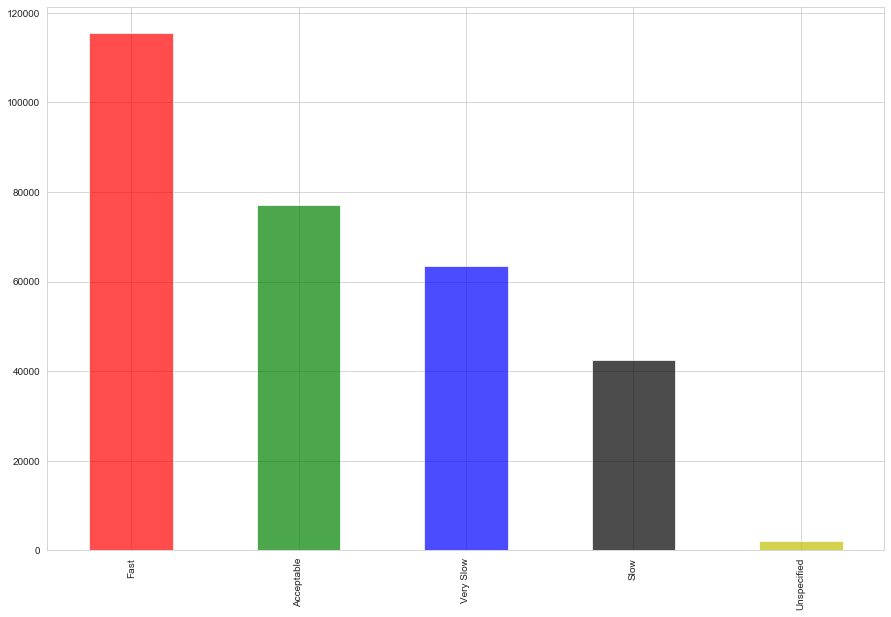

In [95]:
service_data['Request_Closing_Time_Category'].value_counts().plot(kind='bar',
                                                        color=list('rgbkymc'),
                                                            alpha=0.7,figsize=(15,10))
plt.show()

In [23]:
service_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_In_Hr,Request_Closing_Time_Category
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92,Fast
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44,Fast
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86,Slow
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75,Very Slow
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45,Acceptable


###### Insight 2 - Check the month with the most complaint and least complaint, we will create a different column with create_month name

In [24]:
MonthSeries = pd.Series({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
print(MonthSeries)
print(MonthSeries[12])

1      Jan
2      Feb
3      Mar
4      Apr
5      May
6      Jun
7     July
8      Aug
9      Sep
10     Oct
11     Nov
12     Dec
dtype: object
Dec


In [25]:
# function to retrieve month from created date
def getMonth(cDate):
    a = str(cDate)
    date_ = datetime.datetime.strptime(a, "%Y-%m-%d %H:%M:%S")
    return MonthSeries[date_.month]

In [26]:
# Test function to get month
print(service_data['Created Date'][0])
print(getMonth(service_data['Created Date'][0]))

2015-12-31 23:59:45
Dec


In [27]:
# Now we can apply our function to the created month column
service_data['Created_Month'] = service_data['Created Date'].apply(getMonth)
service_data['Created_Month']

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
300693    Mar
300694    Mar
300695    Mar
300696    Mar
300697    Mar
Name: Created_Month, Length: 300698, dtype: object

In [28]:
service_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_In_Hr,Request_Closing_Time_Category,Created_Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92,Fast,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44,Fast,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86,Slow,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75,Very Slow,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45,Acceptable,Dec


In [29]:
service_data['Created_Month'].value_counts()

May     36437
Sep     35427
Jun     35315
Aug     34956
July    34888
Oct     32605
Nov     30773
Dec     30521
Apr     27305
Mar      2471
Name: Created_Month, dtype: int64

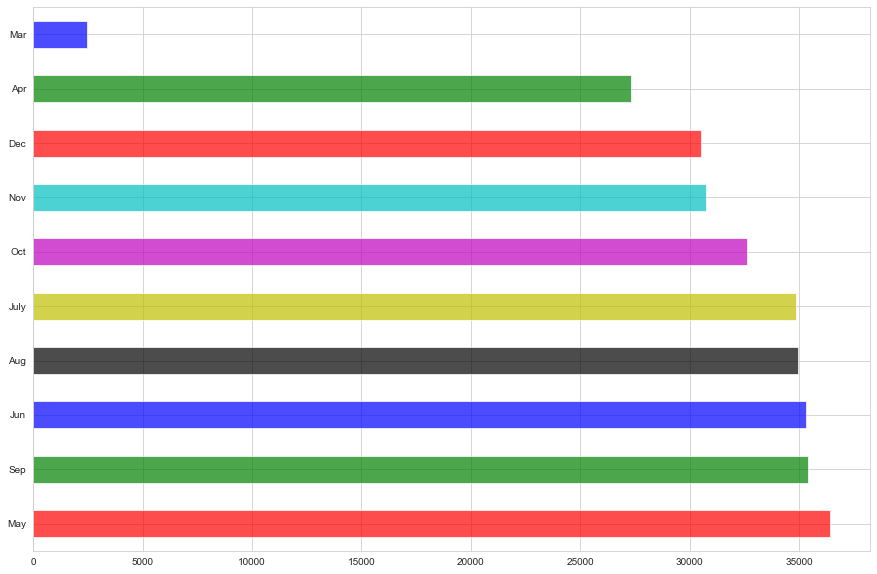

In [30]:
service_data['Created_Month'].value_counts().plot(kind='barh',
                                                        color=list('rgbkymc'),
                                                            alpha=0.7,figsize=(15,10))
plt.show()

The data tells us there was no complaint recieved in the month of january. Also May has the highest number of complaint recieved while March has the least number of complaint recieved

###### Exploring the complaint type

In [31]:
service_data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [32]:
service_data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

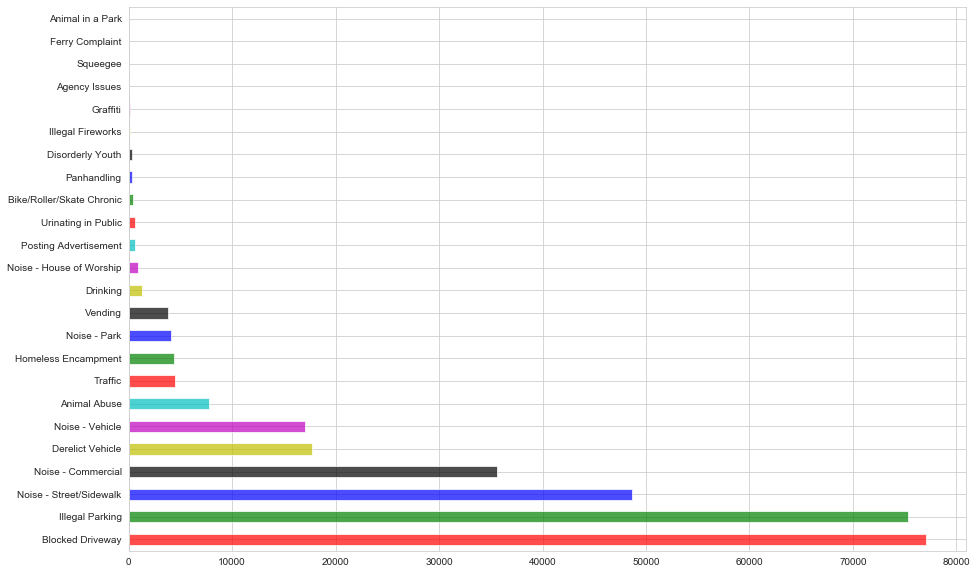

In [33]:
service_data['Complaint Type'].value_counts().plot(kind='barh',
                                                        color=list('rgbkymc'),
                                                            alpha=0.7,figsize=(15,10))
plt.show()

As we can see the majority of the complaints were Blocked high way and illegal parking

###### We can also investigate the complaint type with respect to each location(City) and the Request closing in Hr

In [34]:
service_data['City'].isnull().sum()

2614

In [35]:
# fill all missing values in the city column 
service_data['City'].fillna('Unknown', inplace=True)

In [36]:
service_data['City']

0              NEW YORK
1               ASTORIA
2                 BRONX
3                 BRONX
4              ELMHURST
              ...      
300693          Unknown
300694    RICHMOND HILL
300695         BROOKLYN
300696            BRONX
300697         NEW YORK
Name: City, Length: 300698, dtype: object

In [37]:
grouped_data = service_data.groupby(['City','Complaint Type'])

In [38]:
service_mean = grouped_data.mean()['Request_Closing_In_Hr']
service_mean.isnull().sum()

4

In [39]:
grouped_data = service_data.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hr':'mean'})
grouped_data[:50]

Request_Closing_In_Hr
City    Complaint Type                                  
ARVERNE Animal Abuse                            2.153158
        Blocked Driveway                        2.526000
        Derelict Vehicle                        2.968889
        Disorderly Youth                        3.595000
        Drinking                                0.240000
        Graffiti                                1.530000
        Homeless Encampment                     1.812500
        Illegal Parking                         2.316207
        Noise - Commercial                      2.285000
        Noise - House of Worship                1.562727
        Noise - Park                            1.285000
        Noise - Street/Sidewalk                 1.992759
        Noise - Vehicle                         1.860000
        Panhandling                             1.030000
        Urinating in Public                     0.690000
        Vending                                 0.480000
ASTORIA Animal Abuse                            5.000640
        Bike/Roller/Skate Chronic               1.740667
        Blocked Driveway                        4.816134
        Derelict Vehicle                        9.689117
        Disorderly Youth                        2.903333
        Drinking                                4.722571
        Graffiti                               14.097500
        Homeless Encampment                     4.918750
        Illegal Fireworks                       2.772500
        Illegal Parking                         4.833399
        Noise - Commercial                      3.133039
        Noise - House of Worship                2.022632
        Noise - Park                            2.994754
        Noise - Street/Sidewalk                 3.450829
        Noise - Vehicle                         3.509069
        Panhandling                             1.150000
        Posting Advertisement                   5.870000
        Traffic                                 5.411064
        Urinating in Public                     4.626667
        Vending                                 4.935556
Astoria Blocked Driveway                        4.915086
        Derelict Vehicle                        6.234167
        Illegal Parking                         4.711455
        Noise - Commercial                      3.542069
        Noise - Street/Sidewalk                 3.713421
BAYSIDE Animal Abuse                            3.274865
        Blocked Driveway                        2.562891
        Derelict Vehicle                        3.360051
        Disorderly Youth                        2.970000
        Drinking                                1.900000
        Graffiti                                4.553333
        Homeless Encampment                     2.875000
        Illegal Parking                         2.562763
        Noise - Commercial                      2.234250

In [40]:
 #Check for NaN values
grouped_data[grouped_data['Request_Closing_In_Hr'].isnull()]

Request_Closing_In_Hr
City    Complaint Type                                 
Unknown Ferry Complaint                             NaN
        Noise - House of Worship                    NaN
        Panhandling                                 NaN
        Posting Advertisement                       NaN

In [41]:
#drop missing values
grouped_dropna = grouped_data.dropna()

In [42]:
grouped_dropna.isnull().sum()

Request_Closing_In_Hr    0
dtype: int64

In [43]:
# Check the number of rows
print(grouped_dropna)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[778 rows x 1 columns]


###### We can regroup our data by City and Request closing time ,but this time will sort them in ascending order of time taken to close request for each complaint type.

In [44]:
# sorting by column
group_sorted = grouped_dropna.sort_values(['City','Request_Closing_In_Hr'])
group_sorted[:50]

Request_Closing_In_Hr
City    Complaint Type                                  
ARVERNE Drinking                                0.240000
        Vending                                 0.480000
        Urinating in Public                     0.690000
        Panhandling                             1.030000
        Noise - Park                            1.285000
        Graffiti                                1.530000
        Noise - House of Worship                1.562727
        Homeless Encampment                     1.812500
        Noise - Vehicle                         1.860000
        Noise - Street/Sidewalk                 1.992759
        Animal Abuse                            2.153158
        Noise - Commercial                      2.285000
        Illegal Parking                         2.316207
        Blocked Driveway                        2.526000
        Derelict Vehicle                        2.968889
        Disorderly Youth                        3.595000
ASTORIA Panhandling                             1.150000
        Bike/Roller/Skate Chronic               1.740667
        Noise - House of Worship                2.022632
        Illegal Fireworks                       2.772500
        Disorderly Youth                        2.903333
        Noise - Park                            2.994754
        Noise - Commercial                      3.133039
        Noise - Street/Sidewalk                 3.450829
        Noise - Vehicle                         3.509069
        Urinating in Public                     4.626667
        Drinking                                4.722571
        Blocked Driveway                        4.816134
        Illegal Parking                         4.833399
        Homeless Encampment                     4.918750
        Vending                                 4.935556
        Animal Abuse                            5.000640
        Traffic                                 5.411064
        Posting Advertisement                   5.870000
        Derelict Vehicle                        9.689117
        Graffiti                               14.097500
Astoria Noise - Commercial                      3.542069
        Noise - Street/Sidewalk                 3.713421
        Illegal Parking                         4.711455
        Blocked Driveway                        4.915086
        Derelict Vehicle                        6.234167
BAYSIDE Traffic                                 1.526667
        Noise - Street/Sidewalk                 1.530667
        Noise - Vehicle                         1.709375
        Vending                                 1.880000
        Drinking                                1.900000
        Noise - Commercial                      2.234250
        Illegal Parking                         2.562763
        Blocked Driveway                        2.562891
        Homeless Encampment                     2.875000

## We perform statistical test for the following
- Whether the average response time across complaint types is similar or not
- Are the types of complaint or service requested and location related?

In [45]:
# impport neccessary libraries for statistical analyses
import scipy.stats as stats
from math import sqrt

###### ANOVA Test Statistics
This is analysis of variance test that can be thought of as a generalization of t-tests for more than two groups. Where the independent of t-test is used to compare the means of a condition between more than two groups.Performing ANOVA requires setting a Null and Alternate hypothesis.

- Null hypothesis: There is no significant difference among the groups.
- Alternate Hypothesis: There is a significant difference among the groups.

Therefore, these hypothesis are evaluated based on p-value associated with F-statistics. When p-value is < 0.05, then we reject the Null hypothesis and accept the alternative hypothesis. Also when the p-value is > 0.05 we reject the alternative hypothesis and accept the null hypothesis,thereby going with the conclusion that the means of the groups are equal,hence there is no significant difference.


## We try ANOVA for the first test

###### H0: All complaint Types average response time mean is similar

###### H1: Not similar

In [46]:
service_data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

###### For a quick generalization, we can extract the first six features for analysis

In [47]:
top6_complaints = service_data['Complaint Type'].value_counts()[:6]
top6_complaints

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Name: Complaint Type, dtype: int64

In [48]:
# fetch the complaint names
top6_complaints_names = top6_complaints.index
top6_complaints_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object')

In [49]:
#create sample test with the above features
sample_data = service_data.loc[service_data['Complaint Type'].isin(top6_complaints_names),['Complaint Type','Request_Closing_In_Hr']]
sample_data.head()

,Complaint Type,Request_Closing_In_Hr
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45


In [50]:
sample_data.shape

(271395, 2)

In [51]:
sample_data.isnull().sum()

Complaint Type              0
Request_Closing_In_Hr    2109
dtype: int64

In [52]:
sample_data.dropna(how='any', inplace=True)
sample_data.isnull().sum()

Complaint Type           0
Request_Closing_In_Hr    0
dtype: int64

In [53]:
s1 = sample_data[sample_data['Complaint Type']== top6_complaints_names[0]].Request_Closing_In_Hr
s1.head()

1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Request_Closing_In_Hr, dtype: float64

In [55]:
s2 = sample_data[sample_data['Complaint Type']== top6_complaints_names[1]].Request_Closing_In_Hr
s2.head()

3    7.75
4    3.45
5    1.89
6    1.96
8    8.55
Name: Request_Closing_In_Hr, dtype: float64

In [56]:
s3 = sample_data[sample_data['Complaint Type']== top6_complaints_names[2]].Request_Closing_In_Hr
s3.head()

0     0.92
12    2.48
19    0.78
38    0.49
54    1.50
Name: Request_Closing_In_Hr, dtype: float64

In [57]:
s4 = sample_data[sample_data['Complaint Type']== top6_complaints_names[3]].Request_Closing_In_Hr
s5 = sample_data[sample_data['Complaint Type']== top6_complaints_names[4]].Request_Closing_In_Hr
s6 = sample_data[sample_data['Complaint Type']== top6_complaints_names[5]].Request_Closing_In_Hr

In [58]:
s6.head()

87     6.37
156    2.02
172    3.14
221    3.04
319    0.73
Name: Request_Closing_In_Hr, dtype: float64

In [62]:
# ensure there are no missing values
print(s1.isnull().sum())
print(s2.isnull().sum())
print(s3.isnull().sum())
print(s4.isnull().sum())
print(s5.isnull().sum())
print(s6.isnull().sum())

0
0
0
0
0
0


In [63]:
# test statistics
stats.f_oneway(s1,s2,s3,s4,s5,s6)

F_onewayResult(statistic=1535.6130443833522, pvalue=0.0)

##### The result shows the p-value is less than 0.05, so we reject null hypothesis and conclude the avaerage response time is not the same.

#### Chi-Square Test Statistics
The chisquare statistics is most commonly used to evaluate tests of independence when using a crosstabulation. The crosstabulation presents the distributions of two categorical variables simultaneously with the intersections of the categories of the variables appearing in the cells of the. The test of indpendence assesses whether an association exists between the two variables by comparing the observed pattern of responses in the cell to the pattern that would be expected if the variables were truly independent of each other.
The chisquare is evaluated using the pearson chi-square and observing the p-value.

- Null Hypothesis(H0)- The variables are independent when p-value>(0.05)
- Alternative Hypothesis - The variables are dependent when p-value is < (0.05)

### We try chisquare statistic for the second condition - Are the type of compalint or service requested and location related?

###### H0: Two categories - complaint type and location is independent i.e Not Related

###### H1: Complaint type and location is dependent. i.e Related

In [64]:
top6_location = service_data['City'].value_counts()[:6]
top6_location

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
ASTORIA           6330
Name: City, dtype: int64

In [65]:
top6_location_names = top6_location.index
top6_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA', 'ASTORIA'], dtype='object')

In [66]:
# create sample space
sample_data_location = service_data.loc[(service_data['Complaint Type'].isin(top6_complaints_names)) & (service_data['City'].isin(top6_location_names)),['Complaint Type','City']]
sample_data_location.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN


In [67]:
pd.crosstab(sample_data_location['Complaint Type'], sample_data_location['City'], margins=True)

City,ASTORIA,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,,
Blocked Driveway,2618,12755,28148,2818,2072,2142,50553
Derelict Vehicle,351,1953,5181,954,537,1766,10742
Illegal Parking,1068,7859,27462,1421,12128,4886,54824
Noise - Commercial,1293,2434,11463,429,14550,678,30847
Noise - Street/Sidewalk,386,8892,13356,339,20433,819,44225
Noise - Vehicle,204,3396,5177,302,5485,356,14920
All,5920,37289,90787,6263,55205,10647,206111


In [71]:
# run chisquare stats
ch2,p_value,df,exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_location['Complaint Type'], sample_data_location['City']))

In [73]:
print(ch2)
print(p_value)

43458.66813803645
0.0


### The result above shows the p-value is less than 0.05. So we reject null hypothesis and conclude the complaint type and location is not independent.